In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [3]:
dataset = pd.read_csv("C:\\vs-code-folder\\ML_Practice\\Bengaluru_House_Data.csv")

In [4]:
dataset.head(4)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00


In [6]:
dataset.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

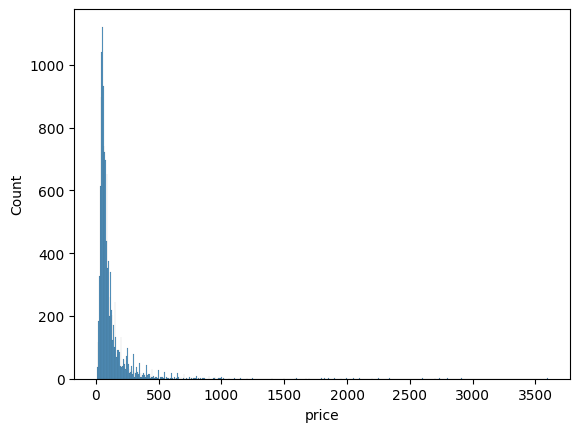

In [9]:
sns.histplot(dataset["price"])
plt.show()

Remove outlier first

In [11]:
q1 = dataset["price"].quantile(0.25)
q3 = dataset["price"].quantile(0.75)
IQR = q3 - q1

In [12]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range,max_range

(-55.0, 225.0)

In [13]:
dataset[dataset["price"]<= max_range]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [14]:
dataset = dataset[dataset["price"]<= max_range]

C:\Users\Anuradha\AppData\Local\Temp\ipykernel_14676\826855408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["price"])


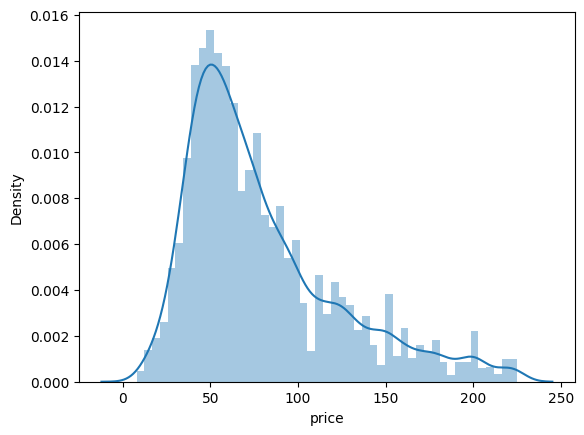

In [16]:
sns.distplot(dataset["price"])
plt.show()

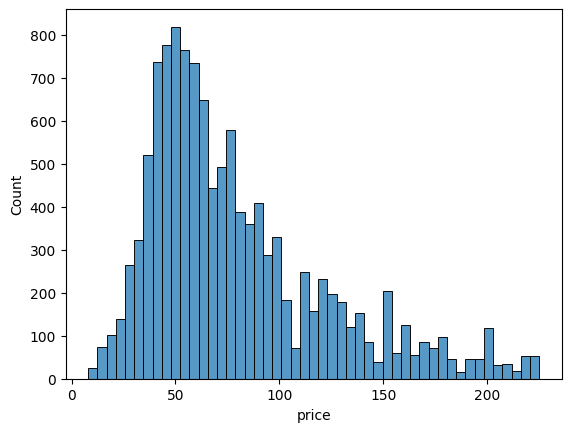

In [15]:
sns.histplot(dataset["price"])
plt.show()

Now converting into normal distribution I will use fuctional Transformation

In [17]:
from sklearn.preprocessing import FunctionTransformer

In [19]:
ft = FunctionTransformer(func=np.log1p)#you can use any function like x^2 log base 10

In [20]:
ft.fit(dataset[["price"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [21]:
ft.transform(dataset[["price"]])

,price
0,3.690628
1,4.795791
2,4.143135
3,4.564348
4,3.951244
...,...
13312,3.871201
13313,4.060443
13314,4.727388
13317,4.110874


In [22]:
dataset["price_ft"] = ft.transform(dataset[["price"]])

In [23]:
dataset.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_ft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,3.690628
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.795791
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,4.143135


C:\Users\Anuradha\AppData\Local\Temp\ipykernel_14676\2418210043.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["price"])
C:\Users\Anuradha\AppData\Local\Temp\ipykernel_14676\2418210043.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["price_ft"])


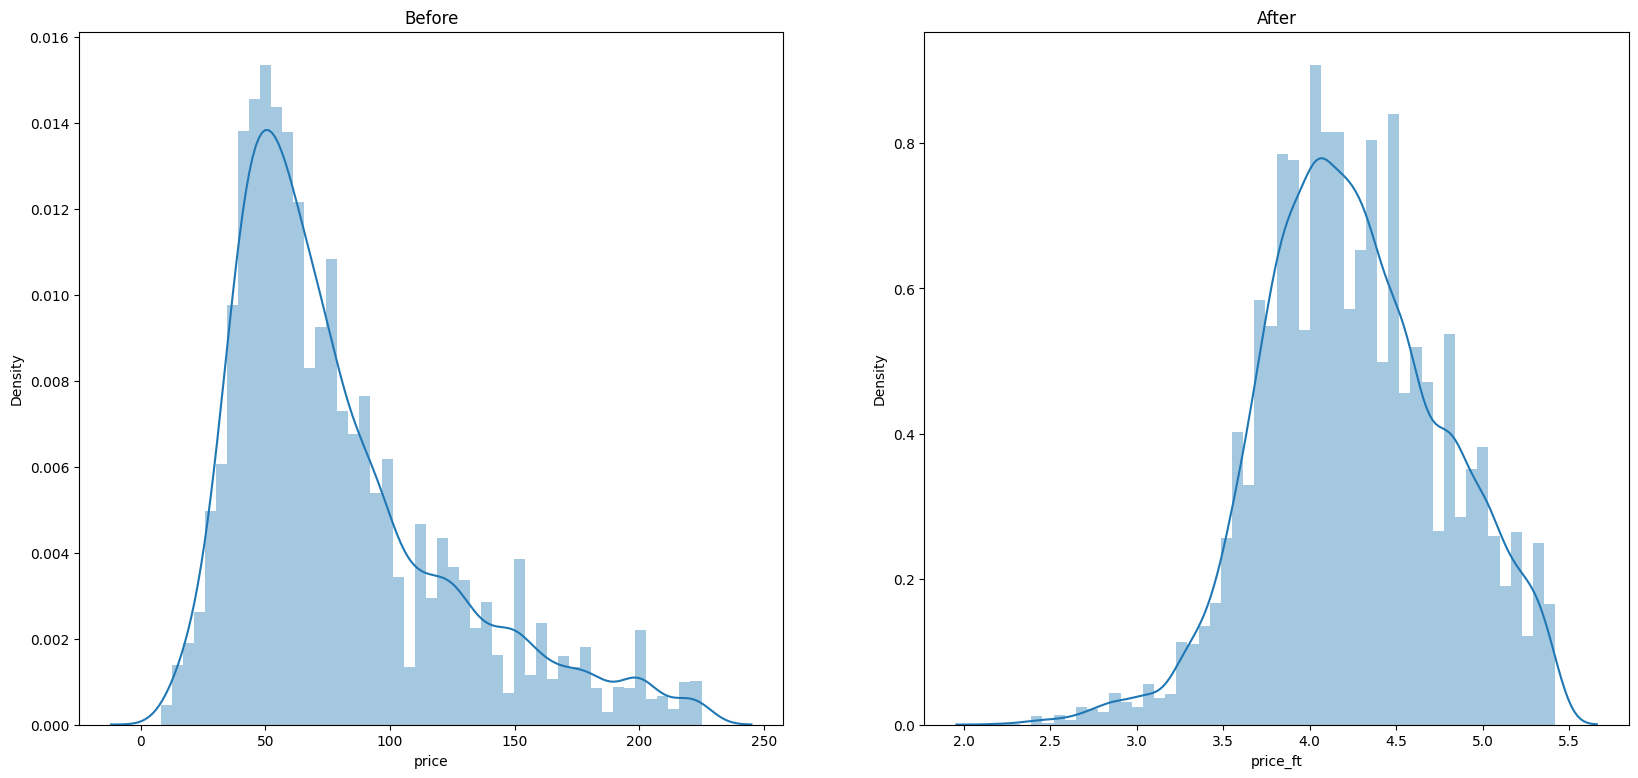

In [27]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["price"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["price_ft"])

plt.show()

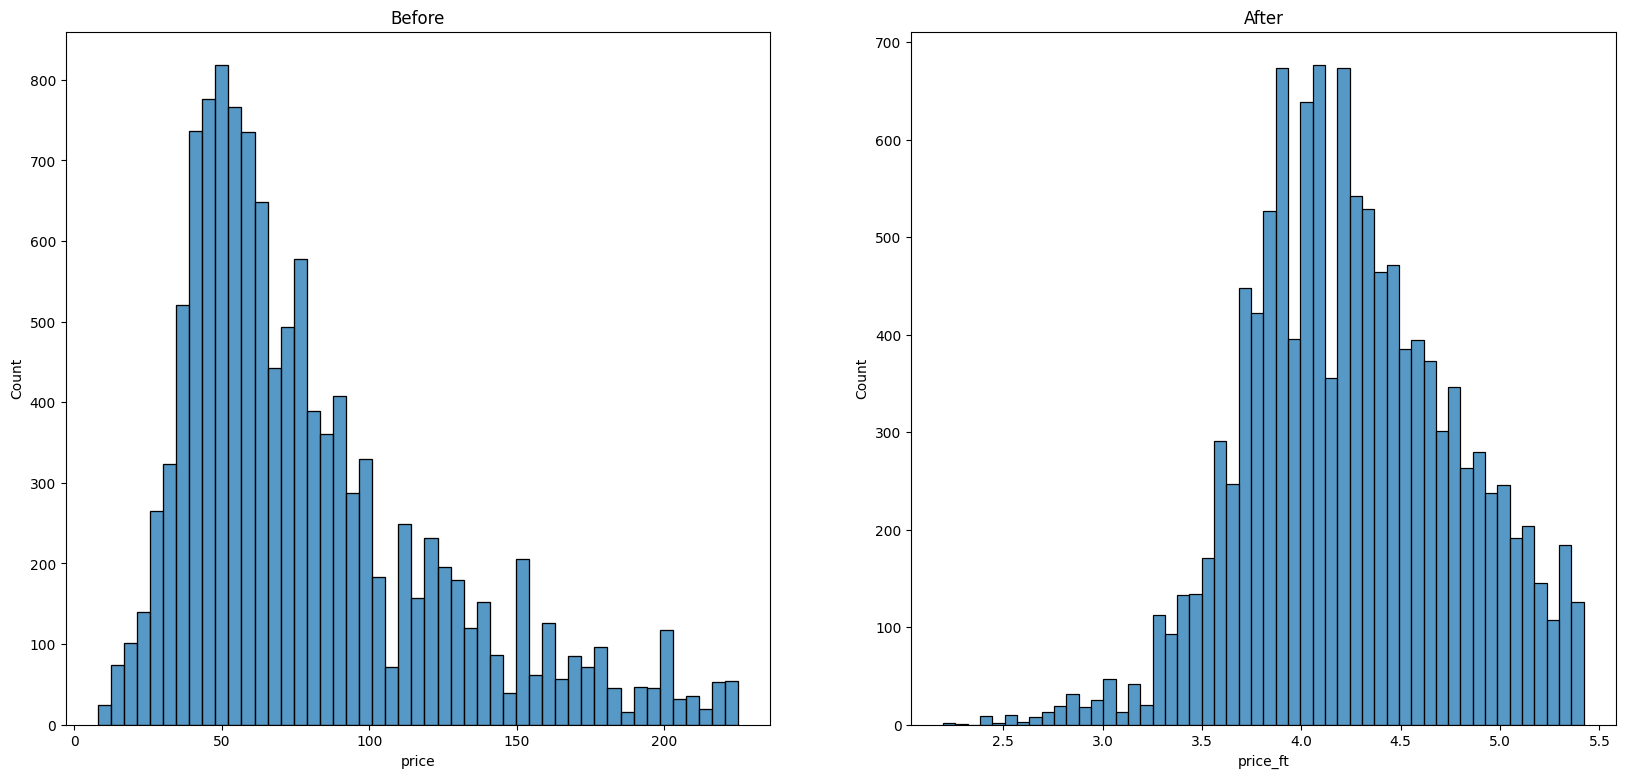

In [26]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(dataset["price"])

plt.subplot(1,2,2)
plt.title("After")
sns.histplot(dataset["price_ft"])

plt.show()